In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
mtcars = pd.read_csv('mtcars.csv')#(r'C:\Users\PRAVEEN\Downloads\mtcars.csv')

In [3]:
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
cars = pd.read_csv('cars.csv')

In [5]:
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [55]:
cars.dtypes

Car              object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Model             int64
Origin           object
dtype: object

In [6]:
x=mtcars._get_numeric_data().columns
x

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

def Graphs(df):
    x=df._get_numeric_data().columns
    for column in df:
        if column in x:
            plt.figure()
            df.boxplot([column],rot = 0,figsize=(8,6),notch=False,grid=False,vert=False)
            plt.xlabel(column.capitalize(),fontsize=10)
            plt.title("Boxplot of "+column,fontsize=14)
            plt.show()
            df.hist([column],figsize=(8,6),grid=False,edgecolor='black')
            plt.xlabel(column.capitalize(),fontsize=10)
            plt.ylabel('Frequency of '+column,fontsize=10)
            plt.title("Histogram of "+column,fontsize=14)
            plt.show()
        else:
            
            df[column].value_counts().plot(kind='bar',color='black',fontsize=10)#, figsize = (8,6))
            plt.xlabel(column.capitalize(),fontsize=10)
            plt.ylabel('Frequency of '+column,fontsize=10)
            plt.title("Barplot of "+column,fontsize=14)
            plt.show()
            
            

Graphs(cars)

In [ ]:
cars.plot()

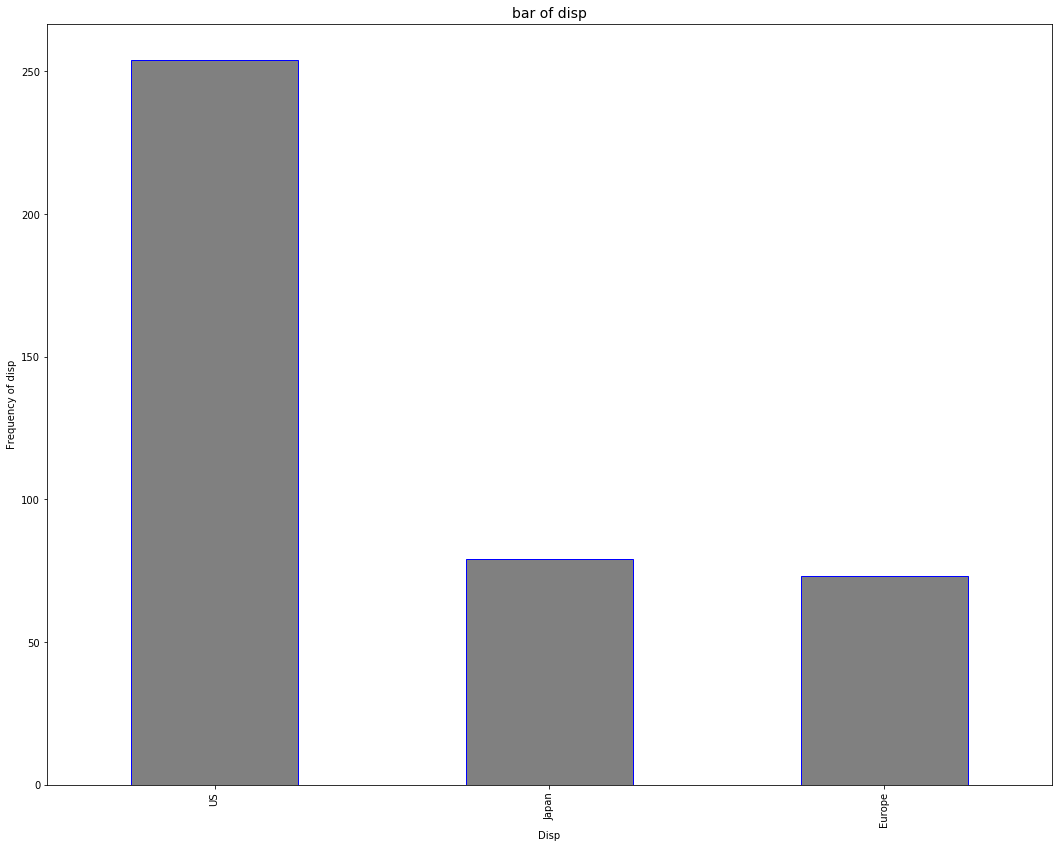

In [68]:
cars.Origin.value_counts().plot(kind='bar',figsize=(18,14),color = 'gray', edgecolor='blue')
plt.xlabel('disp'.capitalize(),fontsize=10)
plt.ylabel('Frequency of '+'disp',fontsize=10)
plt.title("bar of "+'disp',fontsize=14)
plt.show()

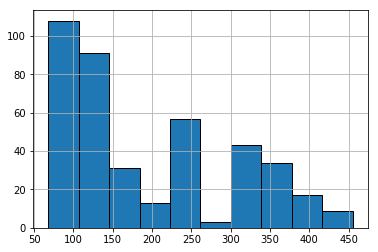

In [81]:
cars.Displacement.hist(edgecolor= 'black')

In [187]:
def Graphs(df,y='', var=[], direc=r'',figsize = (12,8),color = 'blue', edgecolor = 'black'):
    x=df._get_numeric_data().columns
    if direc != r'':
        direc=direc+ "\\"
    if not(y):
        if var:
            for item in var:
                z = df.iloc[:,[item]].columns 
                if z[0] in x:
                    plt.figure()
                    df.boxplot([z[0]],rot = 0,figsize=figsize,notch=False,grid=False,vert=False)
                    plt.xlabel(z[0].capitalize(),fontsize=10)
                    plt.title("Boxplot of "+z[0],fontsize=14)
                    #plt.show()
                    plt.savefig(direc+z[0].capitalize()+'_Boxplot.png')
                    df.hist([z[0]],figsize=figsize,grid=False,color = color, edgecolor=edgecolor)
                    plt.xlabel(z[0].capitalize(),fontsize=10)
                    plt.ylabel('Frequency of '+z[0],fontsize=10)
                    plt.title("Histogram of "+z[0],fontsize=14)
                    #plt.show()
                    plt.savefig(direc+z[0].capitalize()+'_Hist.png')
                else:
                    df[z[0]].value_counts().plot(kind='bar',color=color,fontsize=10, figsize = figsize,edgecolor=edgecolor)
                    plt.xlabel(z[0].capitalize(),fontsize=10)
                    plt.ylabel('Frequency of '+z[0],fontsize=10)
                    plt.title("Barplot of "+z[0],fontsize=14)
                    #plt.show()
                    plt.savefig(direc+z[0].capitalize()+'_BarChart.png')

        else:

            for column in df:
                if column in x:
                    plt.figure()
                    df.boxplot([column],rot = 0,figsize=figsize,notch=False,grid=False,vert=False)
                    plt.xlabel(column.capitalize(),fontsize=10)
                    plt.title("Boxplot of "+column,fontsize=14)
                    #plt.show()
                    plt.savefig(direc+column.capitalize()+'_Boxplot.png')
                    df.hist([column],figsize=figsize, grid=False, color=color, edgecolor=edgecolor)
                    plt.xlabel(column.capitalize(),fontsize=10)
                    plt.ylabel('Frequency of '+column,fontsize=10)
                    plt.title("Histogram of "+column,fontsize=14)
                    #plt.show()
                    plt.savefig(direc+column.capitalize()+'_Hist.png')

                else:
                    df[column].value_counts().plot(kind='bar',color=color,fontsize=10, figsize = figsize,edgecolor=edgecolor)
                    plt.xlabel(column.capitalize(),fontsize=10)
                    plt.ylabel('Frequency of '+column,fontsize=10)
                    plt.title("Barplot of "+column,fontsize=14)
                    #plt.show()
                    plt.savefig(direc+column.capitalize()+'_BarChart.png')
    
    else:
        for column in df:
            if y!=column:
                if y in x:
                    if column in x:
                        #scter for Y numerical and X numerical
                        df.plot(x = column, y = y, kind = 'scatter')
                        plt.title("Scatter Plot of %s and %s" %(column, y))
                        #plt.show()
                        plt.savefig(direc+column+"_and_"+y+"_Scatter_Plot.png")
                    else:
                        #scter for Y numerical and X Categorical
                        sns_plot1 = sns.boxplot(data=df, x=column, y = y).set_title('Box Plot of %s and %s' %(column, y), weight = 'bold')
                        sns_plot1.figure.savefig(direc+column+"_and_"+y+"_Box_Plot.png")
                else:
                    if column in x:
                        #scter for Y categ and X numerical
                        sns_plot1 = sns.boxplot(data=df, x=column, y = y).set_title('Box Plot of %s and %s' %(column, y), weight = 'bold')
                        sns_plot1.figure.savefig(direc+column+"_and_"+y+"_Box_Plot.png")
                    else:
                        #scter for Y categ and X categ (not possible graphs)
                        pass


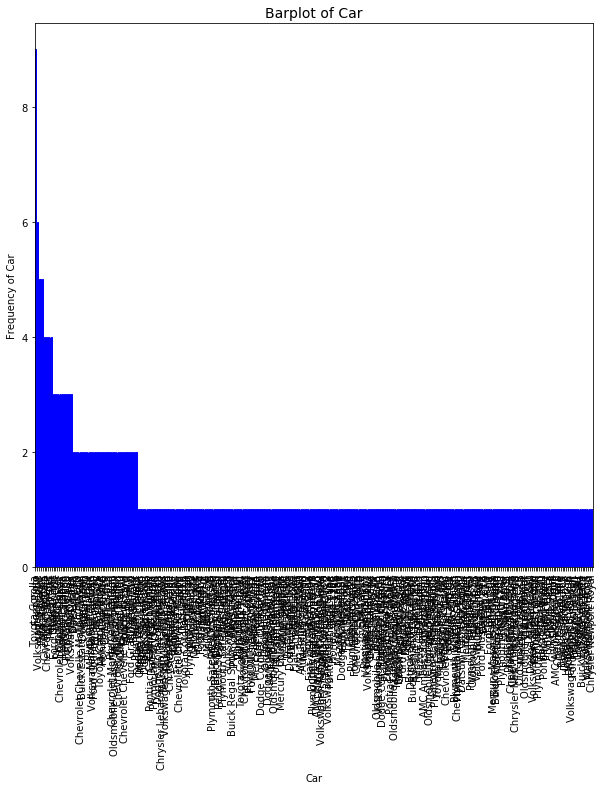

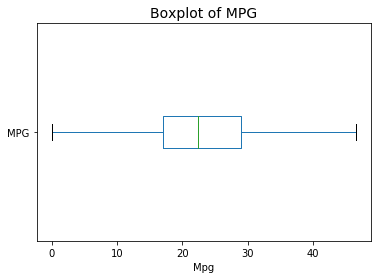

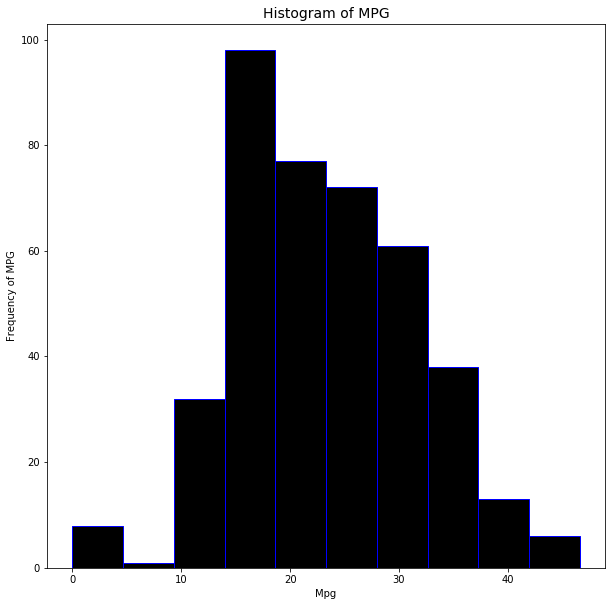

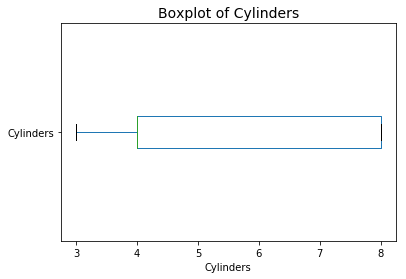

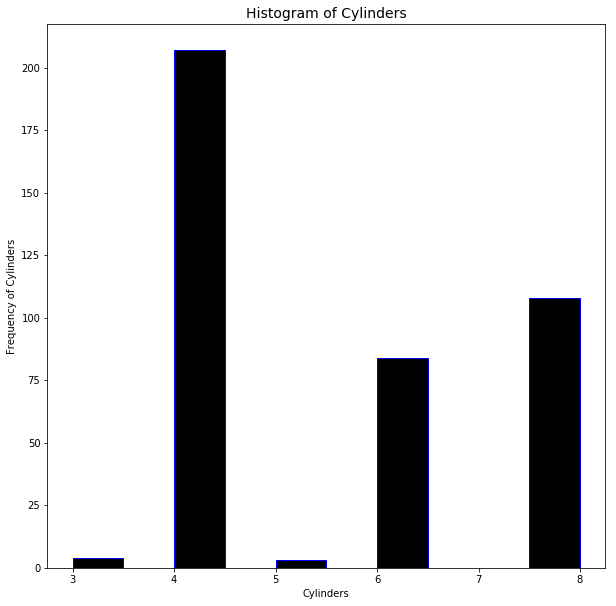

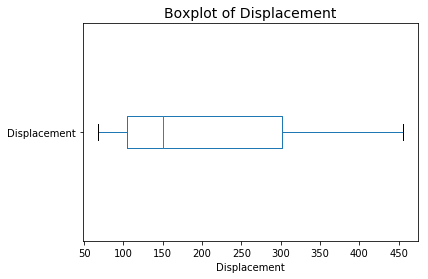

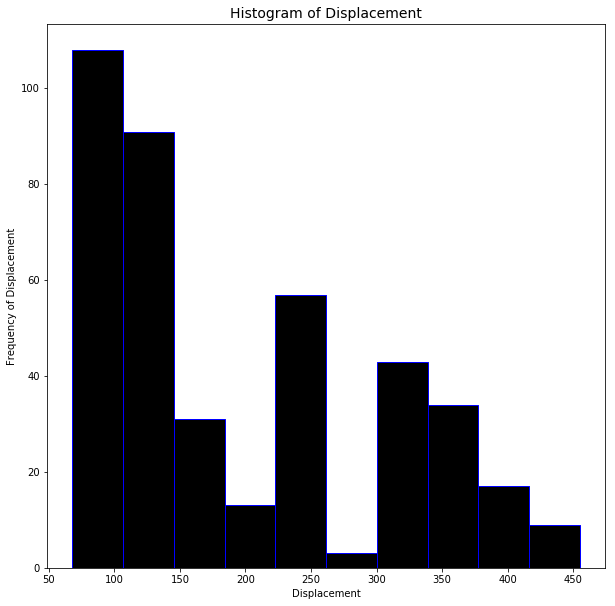

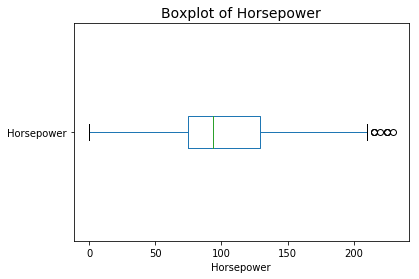

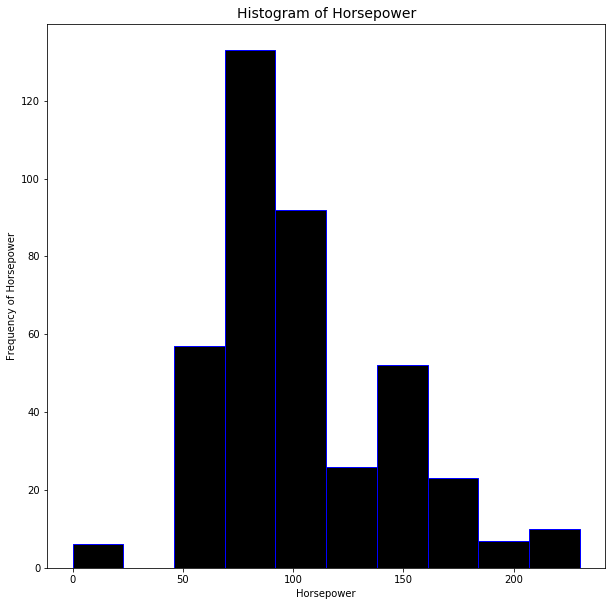

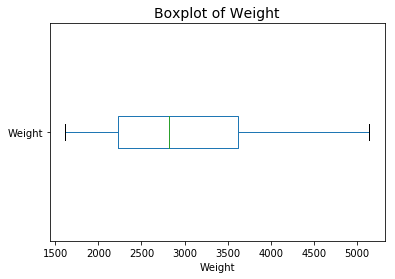

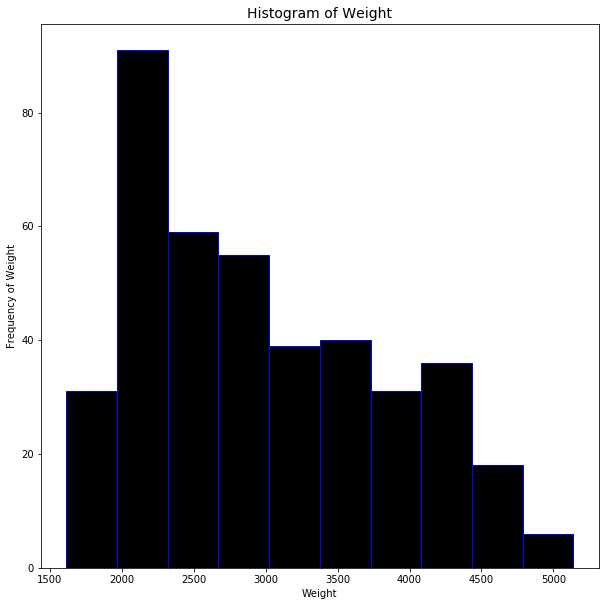

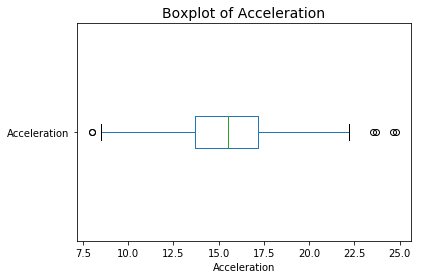

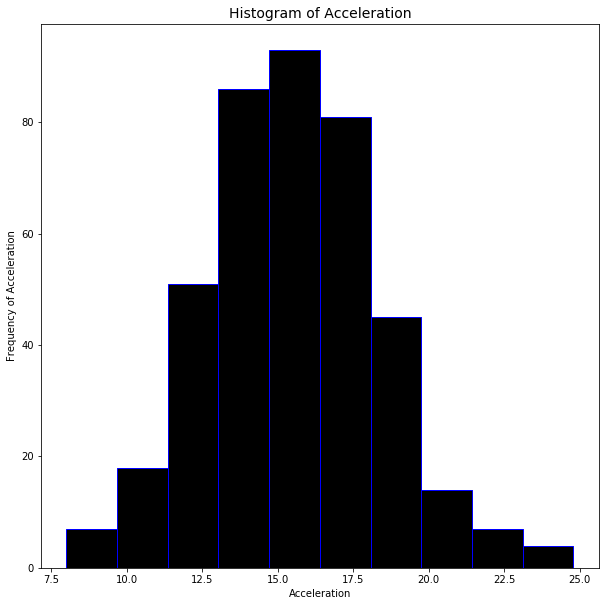

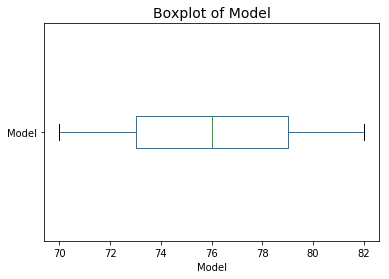

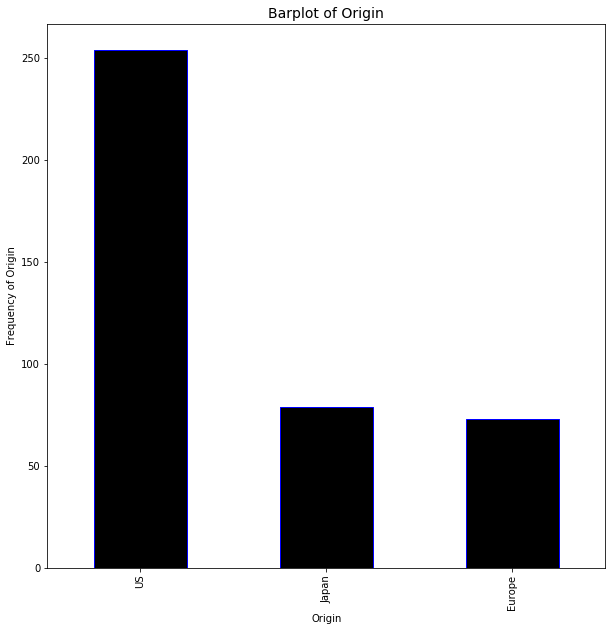

In [189]:
Graphs(cars,direc="F:\\New Folder\\asd\\New Folder",color='black',figsize=(10,10), edgecolor='blue')

In [52]:
#Graphs(cars)
#Graphs(mtcars)

In [51]:
#Graphs(cars, dir = 'F:\New folder')

In [182]:
def bivariate_graphs(df, y, direc=r''):
    if direc != r'':
        direc=direc+ "\\"
    x=df._get_numeric_data().columns
    for column in df:
        if y!=column:
            if y in x:
                if column in x:
                    #scter for Y numerical and X numerical
                    df.plot(x = column, y = y, kind = 'scatter')
                    plt.title("Scatter Plot of %s and %s" %(column, y))
                    #plt.show()
                    plt.savefig(direc+column+"_and_"+y+"_Scatter_Plot.png")
                else:
                    #scter for Y numerical and X Categorical
                    sns_plot1 = sns.boxplot(data=df, x=column, y = y).set_title('Box Plot of %s and %s' %(column, y), weight = 'bold')
                    sns_plot1.figure.savefig(direc+column+"_and_"+y+"_Box_Plot.png")
            else:
                if column in x:
                    #scter for Y categ and X numerical
                    sns_plot1 = sns.boxplot(data=df, x=column, y = y).set_title('Box Plot of %s and %s' %(column, y), weight = 'bold')
                    sns_plot1.figure.savefig(direc+column+"_and_"+y+"_Box_Plot.png")
                else:
                    #scter for Y categ and X categ (not possible graphs)
                    pass
            
                

In [184]:
##bivariate_graphs(cars,"MPG",direc=r"F:\New folder\asd\New folder")

Text(0.5,1,'HIiiiii')

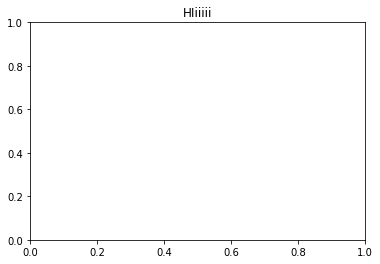

In [156]:
aa = sns.jointplot(data=cars, x=cars.Weight, y = cars.MPG)
plt.title("HIiiiii")

In [114]:
#sns.boxplot(data=cars, x=cars.Cylinders, y = cars.MPG)

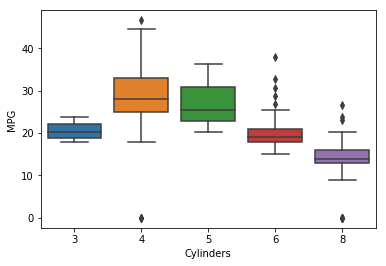

In [181]:
sns.boxplot(data=cars, x=cars.Cylinders, y = cars.MPG)

In [112]:
#sns.jointplot(data=cars, x=cars.MPG, y = cars.Origin)

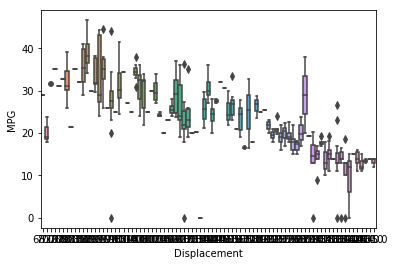

In [171]:
sns.boxplot(data=cars, x=cars.Displacement, y = cars.MPG)

In [115]:
import numpy as np

In [126]:
#pd.corr(cars.MPG, cars.Weight)str
str(round(cars.Weight.corr(cars.MPG),3))

'-0.788'

In [ ]:
cars.plot(x = 'Weight', y = 'MPG', kind = 'scatter')
plt.show()

In [178]:
def bivariate_graphs(df, y, direc=r''):
    if direc != r'':
        direc=direc+ "\\"
    x=df._get_numeric_data().columns
    for column in df:
        if y!=column:
            if y in x:
                if column in x:
                    #scter for Y numerical and X numerical
                                        
                    df.plot(x = column, y = y, kind = 'scatter')
                    plt.title("Scatter Plot of %s and %s" %(column, y))
                    #plt.show()
                    plt.savefig(direc+column+"_and_"+y+"_Scatter_Plot.png")
                    
                    plt.close()
                    
                    
                    sns_plot1 = sns.boxplot(data=df, x=column, y = y).set_title('Box Plot of %s and %s' %(column, y), weight = 'bold')
                    sns_plot1.figure.savefig(direc+column+"_and_"+y+"_Box_Plot.png")
                    
                    
                else:
                    #scter for Y numerical and X Categorical
                    sns_plot1 = sns.boxplot(data=df, x=column, y = y).set_title('Box Plot of %s and %s' %(column, y), weight = 'bold')
                    sns_plot1.figure.savefig(direc+column+"_and_"+y+"_Box_Plot.png")
            else:
                if column in x:
                    #scter for Y categ and X numerical
                    sns_plot1 = sns.boxplot(data=df, x=column, y = y).set_title('Box Plot of %s and %s' %(column, y), weight = 'bold')
                    sns_plot1.figure.savefig(direc+column+"_and_"+y+"_Box_Plot.png")
                else:
                    #scter for Y categ and X categ (not possible graphs)
                    pass

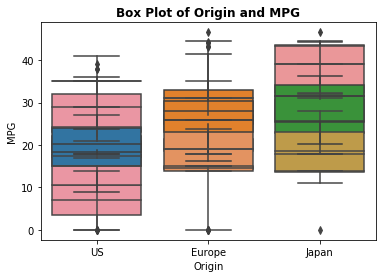

In [179]:
bivariate_graphs(cars,y='MPG',direc=r"F:\New folder\asd\New folder")

In [ ]:
plt.close()

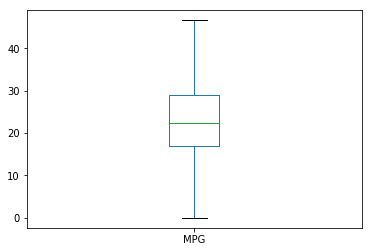

In [180]:
cars.plot(kind='box', x='Cylinders', y = 'MPG')
plt.show()